Important imports.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils import load_json_data

Load the raw data.

In [2]:
data = load_json_data(r'data\raw\data.json')

In [3]:
data

[{'talent': {'languages': [{'rating': 'C2', 'title': 'German'},
    {'rating': 'C2', 'title': 'English'},
    {'rating': 'B2', 'title': 'French'},
    {'rating': 'A2', 'title': 'Turkish'}],
   'job_roles': ['frontend-developer',
    'backend-developer',
    'full-stack-developer',
    'java-developer',
    'mobile-developer'],
   'seniority': 'junior',
   'salary_expectation': 48000,
   'degree': 'bachelor'},
  'job': {'languages': [{'title': 'German', 'rating': 'C1', 'must_have': True},
    {'title': 'English', 'rating': 'B2', 'must_have': True}],
   'job_roles': ['frontend-developer'],
   'seniorities': ['junior', 'midlevel'],
   'max_salary': 70000,
   'min_degree': 'none'},
  'label': True},
 {'talent': {'languages': [{'rating': 'C2', 'title': 'German'},
    {'rating': 'C2', 'title': 'English'},
    {'rating': 'A2', 'title': 'Spanish'},
    {'rating': 'A2', 'title': 'French'}],
   'job_roles': ['frontend-developer',
    'full-stack-developer',
    'c-c-developer',
    'mobile-devel

Function to process the data into a usable format for analysis.

In [4]:
def preprocess_data(data):
    """
    Processing data into a usable format for analysis.

    Args:
        data (list): List of dictionaries containing talent and job profiles and their labels.

    Returns:
        DataFrame: Pandas Dataframe containing the processed data.
    """
    processed_data = {
        'talent_degree': [],
        'talent_job_roles': [],
        'talent_languages': [],
        'talent_seniority': [],
        'talent_salary_expectation': [],
        'job_job_roles': [],
        'job_languages': [],
        'job_max_salary': [],
        'job_min_degree': [],
        'job_seniorities': [],
        'label': []
    }

    for entry in data:
        talent = entry['talent']
        job = entry['job']
        label = entry['label']

        # Process talent features
        processed_data['talent_degree'].append(talent.get('degree', 'Unknown'))
        processed_data['talent_job_roles'].append(talent.get('job_roles', []))
        processed_data['talent_languages'].append([lang['title'] for lang in talent.get('languages', [])])
        processed_data['talent_seniority'].append(talent.get('seniority', 'Unknown'))
        processed_data['talent_salary_expectation'].append(talent.get('salary_expectation', 0))

        # Process job features
        processed_data['job_job_roles'].append(job.get('job_roles', []))
        processed_data['job_languages'].append([lang['title'] for lang in job.get('languages', [])])
        processed_data['job_max_salary'].append(job.get('max_salary', 0))
        processed_data['job_min_degree'].append(job.get('min_degree', 'Unknown'))
        processed_data['job_seniorities'].append(job.get('seniorities', []))

        # Process label
        processed_data['label'].append(label)

    return pd.DataFrame(processed_data)

Apply the processing on the raw data.

In [5]:
df = preprocess_data(data)

Check the list of columns of the new dataframe.

In [6]:
print(df.columns)

Index(['talent_degree', 'talent_job_roles', 'talent_languages',
       'talent_seniority', 'talent_salary_expectation', 'job_job_roles',
       'job_languages', 'job_max_salary', 'job_min_degree', 'job_seniorities',
       'label'],
      dtype='object')


Summary of the dataframe.

In [7]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       talent_salary_expectation  job_max_salary
count                2000.000000     2000.000000
mean                71710.889500    72658.000000
std                 21867.684002     9237.678461
min                 25000.000000    45000.000000
25%                 55000.000000    70000.000000
50%                 70000.000000    70000.000000
75%                 86800.000000    80000.000000
max                137080.000000   100000.000000


Getting the unique values of the columns.

In [8]:
df['talent_degree'].unique()

array(['bachelor', 'master', 'none', 'apprenticeship', 'doctorate'],
      dtype=object)

In [9]:
df['talent_seniority'].unique()

array(['junior', 'senior', 'midlevel', 'none'], dtype=object)

In [10]:
df['job_min_degree'].unique()

array(['none', 'bachelor', 'master', 'apprenticeship', 'doctorate'],
      dtype=object)

In [11]:
def get_unique_values_count_in_df_column(dataframe, column):

    list_entries = []

    for entry in dataframe[column]:
        list_entries += entry

    list_entries = set(list_entries)

    print(f"Number of unique {column}: {len(list_entries)}")

In [12]:
get_unique_values_count_in_df_column(df, "talent_job_roles")
get_unique_values_count_in_df_column(df, "job_job_roles")
get_unique_values_count_in_df_column(df, "talent_languages")
get_unique_values_count_in_df_column(df, "job_languages")

Number of unique talent_job_roles: 53
Number of unique job_job_roles: 33
Number of unique talent_languages: 35
Number of unique job_languages: 2


Plots to analyze the features in the data.

c:\Users\ZeusAceX\anaconda3\envs\instaffo_ml_assignment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ZeusAceX\anaconda3\envs\instaffo_ml_assignment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


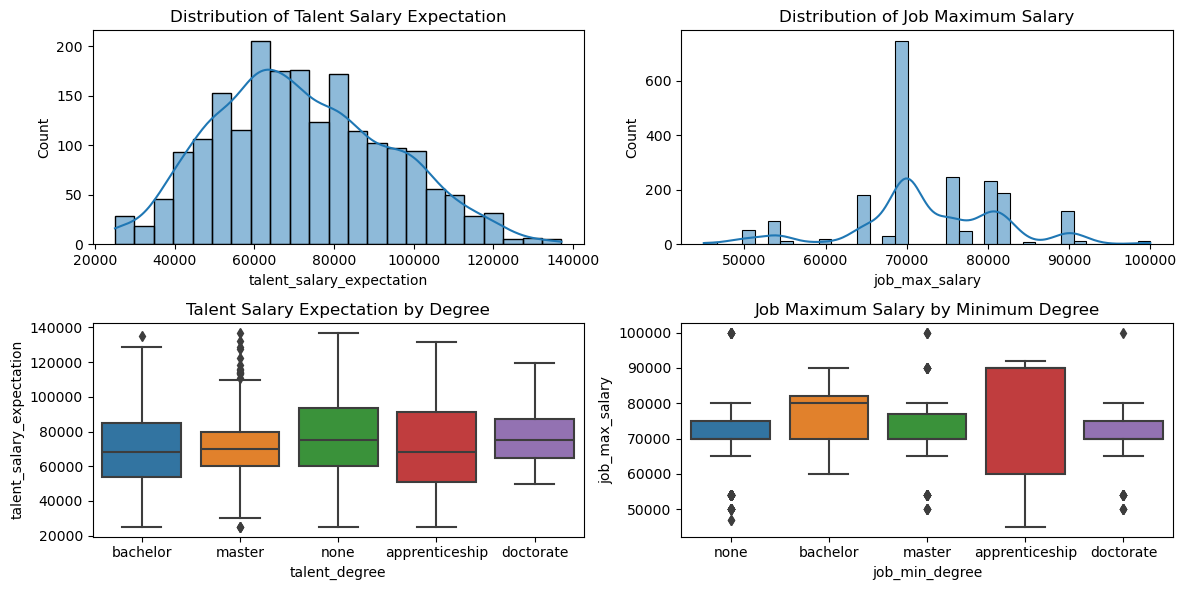

In [13]:
# Distribution plots for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['talent_salary_expectation'], kde=True)
plt.title('Distribution of Talent Salary Expectation')

plt.subplot(2, 2, 2)
sns.histplot(df['job_max_salary'], kde=True)
plt.title('Distribution of Job Maximum Salary')

plt.subplot(2, 2, 3)
sns.boxplot(x='talent_degree', y='talent_salary_expectation', data=df)
plt.title('Talent Salary Expectation by Degree')

plt.subplot(2, 2, 4)
sns.boxplot(x='job_min_degree', y='job_max_salary', data=df)
plt.title('Job Maximum Salary by Minimum Degree')
plt.tight_layout()
plt.show()

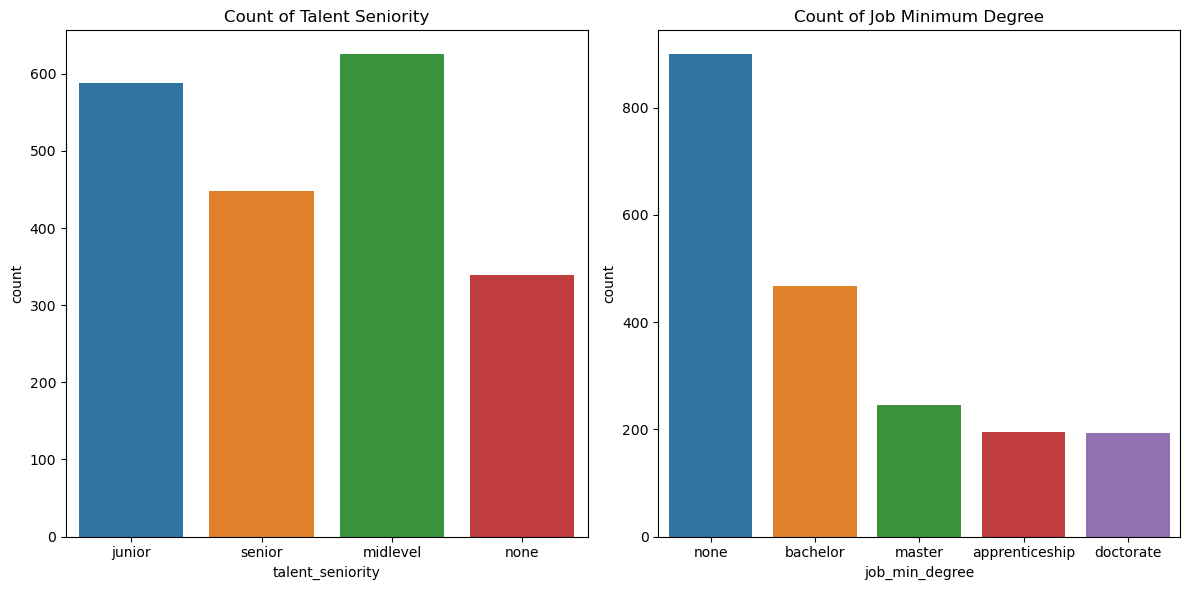

In [14]:
# Count plots for categorical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='talent_seniority', data=df)
plt.title('Count of Talent Seniority')

plt.subplot(1, 2, 2)
sns.countplot(x='job_min_degree', data=df)
plt.title('Count of Job Minimum Degree')
plt.tight_layout()
plt.show()

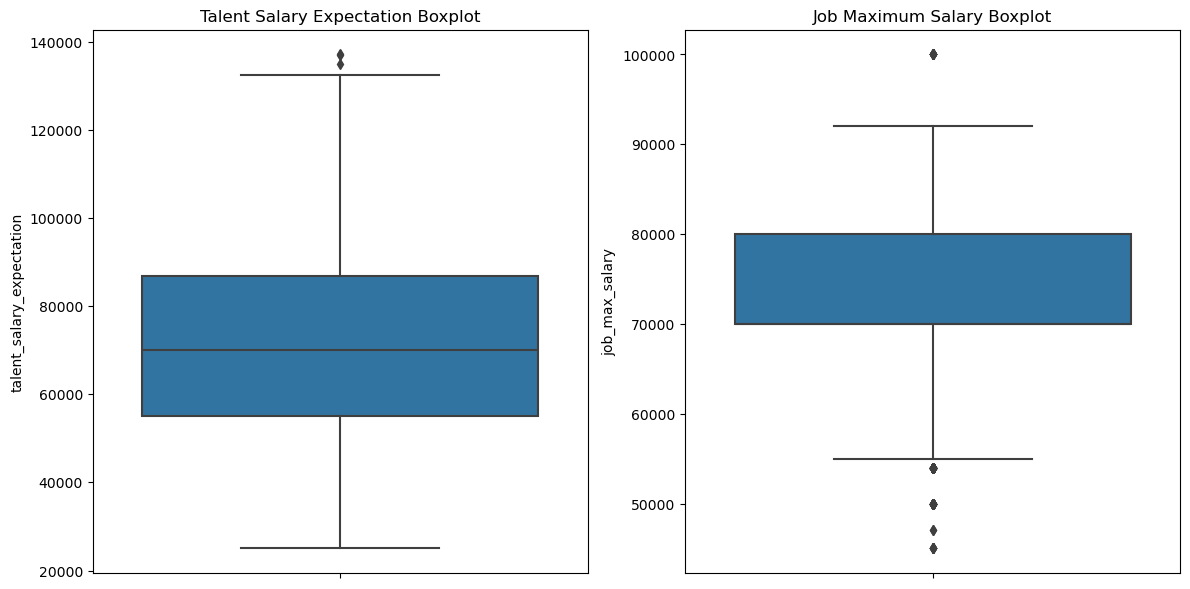

In [15]:
# Outlier detection
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='talent_salary_expectation', data=df)
plt.title('Talent Salary Expectation Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y='job_max_salary', data=df)
plt.title('Job Maximum Salary Boxplot')
plt.tight_layout()
plt.show()